In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)

%matplotlib inline

numpy version: 1.20.3
pandas version: 1.3.4
scikit-learn version: 0.24.2
matplotlib version: 3.4.3


In [5]:
dfNormal = pd.read_csv("penis.csv")

In [24]:
print(dfNormal.head())

       Country         Region  length_flaccid  length_erect  circumf_flaccid  \
0  Afghanistan   Central Asia             9.5         13.69              9.1   
1      Albania         Europe             9.8         14.19              9.7   
2      Algeria         Africa             9.9         14.49              8.9   
3       Angola         Africa            10.0         15.73              9.6   
4    Argentina  South America             9.4         14.88              8.9   

   circumf_erect  volume_erect  volume_flaccid         Method       N  \
0          11.42        142.08           62.60       Measured   100.0   
1          12.16        166.97           73.38  Self reported    95.0   
2          10.97        138.76           62.40  Self reported   738.0   
3          11.82        174.89           73.34       Measured   978.0   
4          11.45        155.24           59.25  Self reported  1669.0   

                                   Source  growth_length  growth_circumf  \
0  J

In [29]:
pp = dfNormal[['length_erect', 'Region']]
country = dfNormal[['Country']]

region = dfNormal[['Region']]

In [30]:
a = [region]
for i in range(len(a)):
    for j in range(i + 1):
         print(a[i])

             Region
0      Central Asia
1            Europe
2            Africa
3            Africa
4     South America
..              ...
134   South America
135    Western Asia
136   South America
137  Southeast Asia
138    Western Asia

[139 rows x 1 columns]


(array([42., 22., 12.,  2., 16.,  7., 10., 13.,  4., 11.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

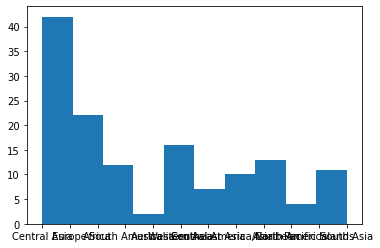

In [37]:
plt.hist(region)

In [41]:
dfNormal['measured-id'] = dfNormal['Method'].map({'Measured': 0, 'Self reported': 1})
data = dfNormal[['length_erect', 'measured-id']]
print(data)

     length_erect  measured-id
0           13.69            0
1           14.19            1
2           14.49            1
3           15.73            0
4           14.88            1
..            ...          ...
134         14.67            1
135         13.43            0
136         16.93            0
137         10.15            0
138         12.70            0

[139 rows x 2 columns]


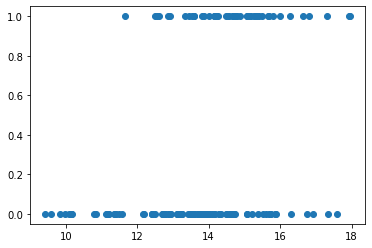

In [46]:
x = dfNormal[['length_erect']]
y = dfNormal[['measured-id']]
plt.scatter(x, y)

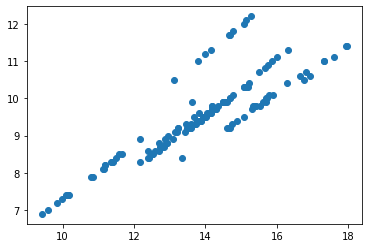

In [33]:
x = dfNormal[['length_erect']]
y = dfNormal[['length_flaccid']]
plt.scatter(x, y)

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

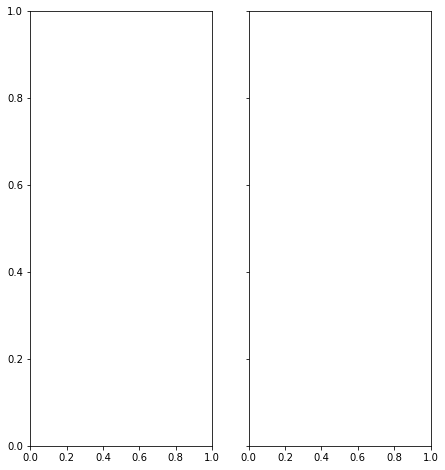

In [51]:
Datafeatures = tuple(dfNormal.columns[:2].values)
dfNormal.boxplot(column=Datafeatures, by='measured-id', figsize=(15,8), layout=(1,4));

In [35]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

ValueError: too many values to unpack (expected 4)